# **Chapter 3. Python 을 활용한 데이터 전처리** 





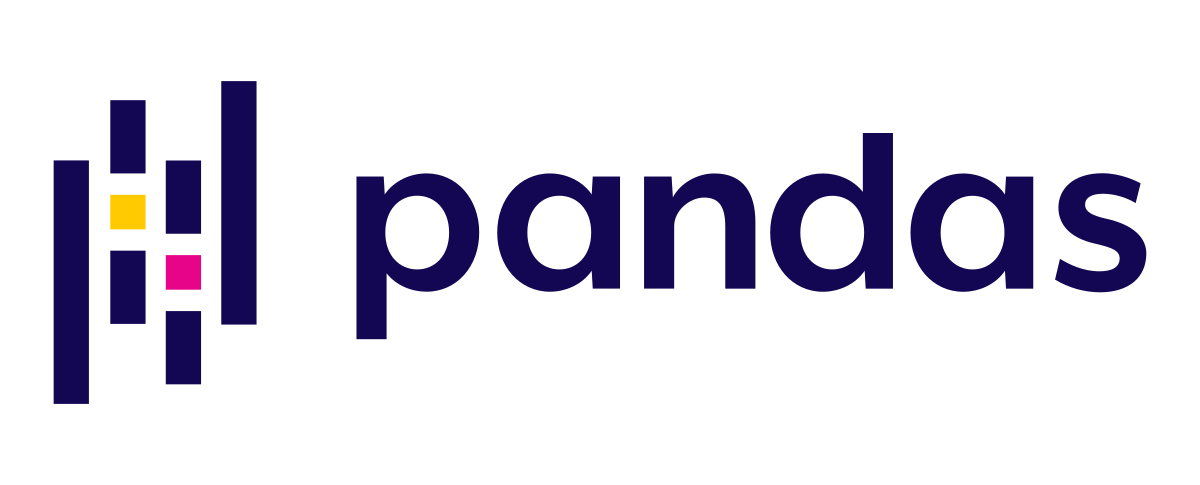


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> **3-9. 데이터 합치기 (Join 과 Merge, Concat)** <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-9. 데이터 합치기 (Join 과 Merge)

In [1]:
# 라이브러리 임포트
import pandas as pd

In [2]:
# 실습 파일 로딩 (아이돌 프로필)
# df = pd.read_csv('https://bit.ly/3gRXTfD')
df = pd.read_csv('kpop_idols.csv')
df

Profile Stage Name        Full Name Korean Name K. Stage Name  \
0     Profile    Taeyeon      Kim Taeyeon         김태연            태연   
1         NaN      Sunny       Lee Sunkyu         이순규            써니   
2         NaN    Tiffany    Hwang Miyoung         황미영           티파니   
3         NaN    Hyoyeon      Kim Hyoyeon         김효연            효연   
4         NaN       Yuri        Kwon Yuri         권유리            유리   
...       ...        ...              ...         ...           ...   
1589      NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590      NaN       Nayu        Kim Yewon         김예원            나유   
1591      NaN       Elva      Lee Yonghwa         이용화            엘바   
1592      NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593      NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth  Group      Country Second Country  Height  Weight  \
0       1989-03-09   SNSD  South Korea            NaN     160      44   
1       1989-05-15   SNSD  South Korea            NaN     158      43   
2       1989-08-01   SNSD  South Korea            USA     163      50   
3       1989-09-22   SNSD  South Korea            NaN     158      48   
4       1989-12-05   SNSD  South Korea            NaN     167      45   
...            ...    ...          ...            ...     ...     ...   
1589    2002-07-02  ILY:1        Japan            NaN     162       0   
1590    2002-07-23  ILY:1  South Korea            NaN       0       0   
1591    2003-05-05  ILY:1  South Korea            NaN       0       0   
1592    2002-10-17  NMIXX    Australia    South Korea       0       0   
1593    2003-02-25  NMIXX  South Korea            NaN       0       0   

         Birthplace Other Group Former Group Gender               Position  \
0            Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
1        California         NaN          NaN      F                    NaN   
2     San Francisco         TTS          NaN      F                    NaN   
3           Incheon         NaN          NaN      F                    NaN   
4            Goyang         NaN          NaN      F                    NaN   
...             ...         ...          ...    ...                    ...   
1589            NaN         NaN          NaN      F                    NaN   
1590            NaN         NaN          NaN      F                    NaN   
1591            NaN         NaN          NaN      F                    NaN   
1592     Marysville         NaN          NaN      F                    NaN   
1593            NaN         NaN          NaN      F                    NaN   

         Instagram Twitter  
0       taeyeon_ss     NaN  
1       svnnynight     NaN  
2     xolovestephi     NaN  
3      watasiwahyo     NaN  
4          yulyulk     NaN  
...            ...     ...  
1589           NaN     NaN  
1590           NaN     NaN  
1591           NaN     NaN  
1592           NaN     NaN  
1593           NaN     NaN  

[1594 rows x 18 columns]

In [3]:
# 상위 5개 정보 사용
df1 = df.iloc[:,1:11].head(5)
df2 = df.loc[3:10, ['Korean Name', 'Instagram']]

In [4]:
df1

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45

In [5]:
df2

Korean Name    Instagram
3          김효연  watasiwahyo
4          권유리      yulyulk
5          최수영   hotsootuff
6          임윤아   yoona__lim
7          서주현  seojuhyun_s
8        제시카 정  jessica.syj
9          이채린    chaelincl
10          박봄   haroobommi

> ###  **3-9-1. Join**


> **두개의 데이터 프레임(DataFrame) 을 겹치는 "인덱스(Index)" 기준으로 합치는 것**
> - Join 에는 **'`Inner Join`', '`Left Join`', '`Right Join`', '`Outer Join`', 4가지 방식이 있습니다.**
> - 기본 사용법  
    - **`df1.join(df2, on='키 인덱스', how='조인 방법', sort='정렬 여부')`**


> <br>
>
> 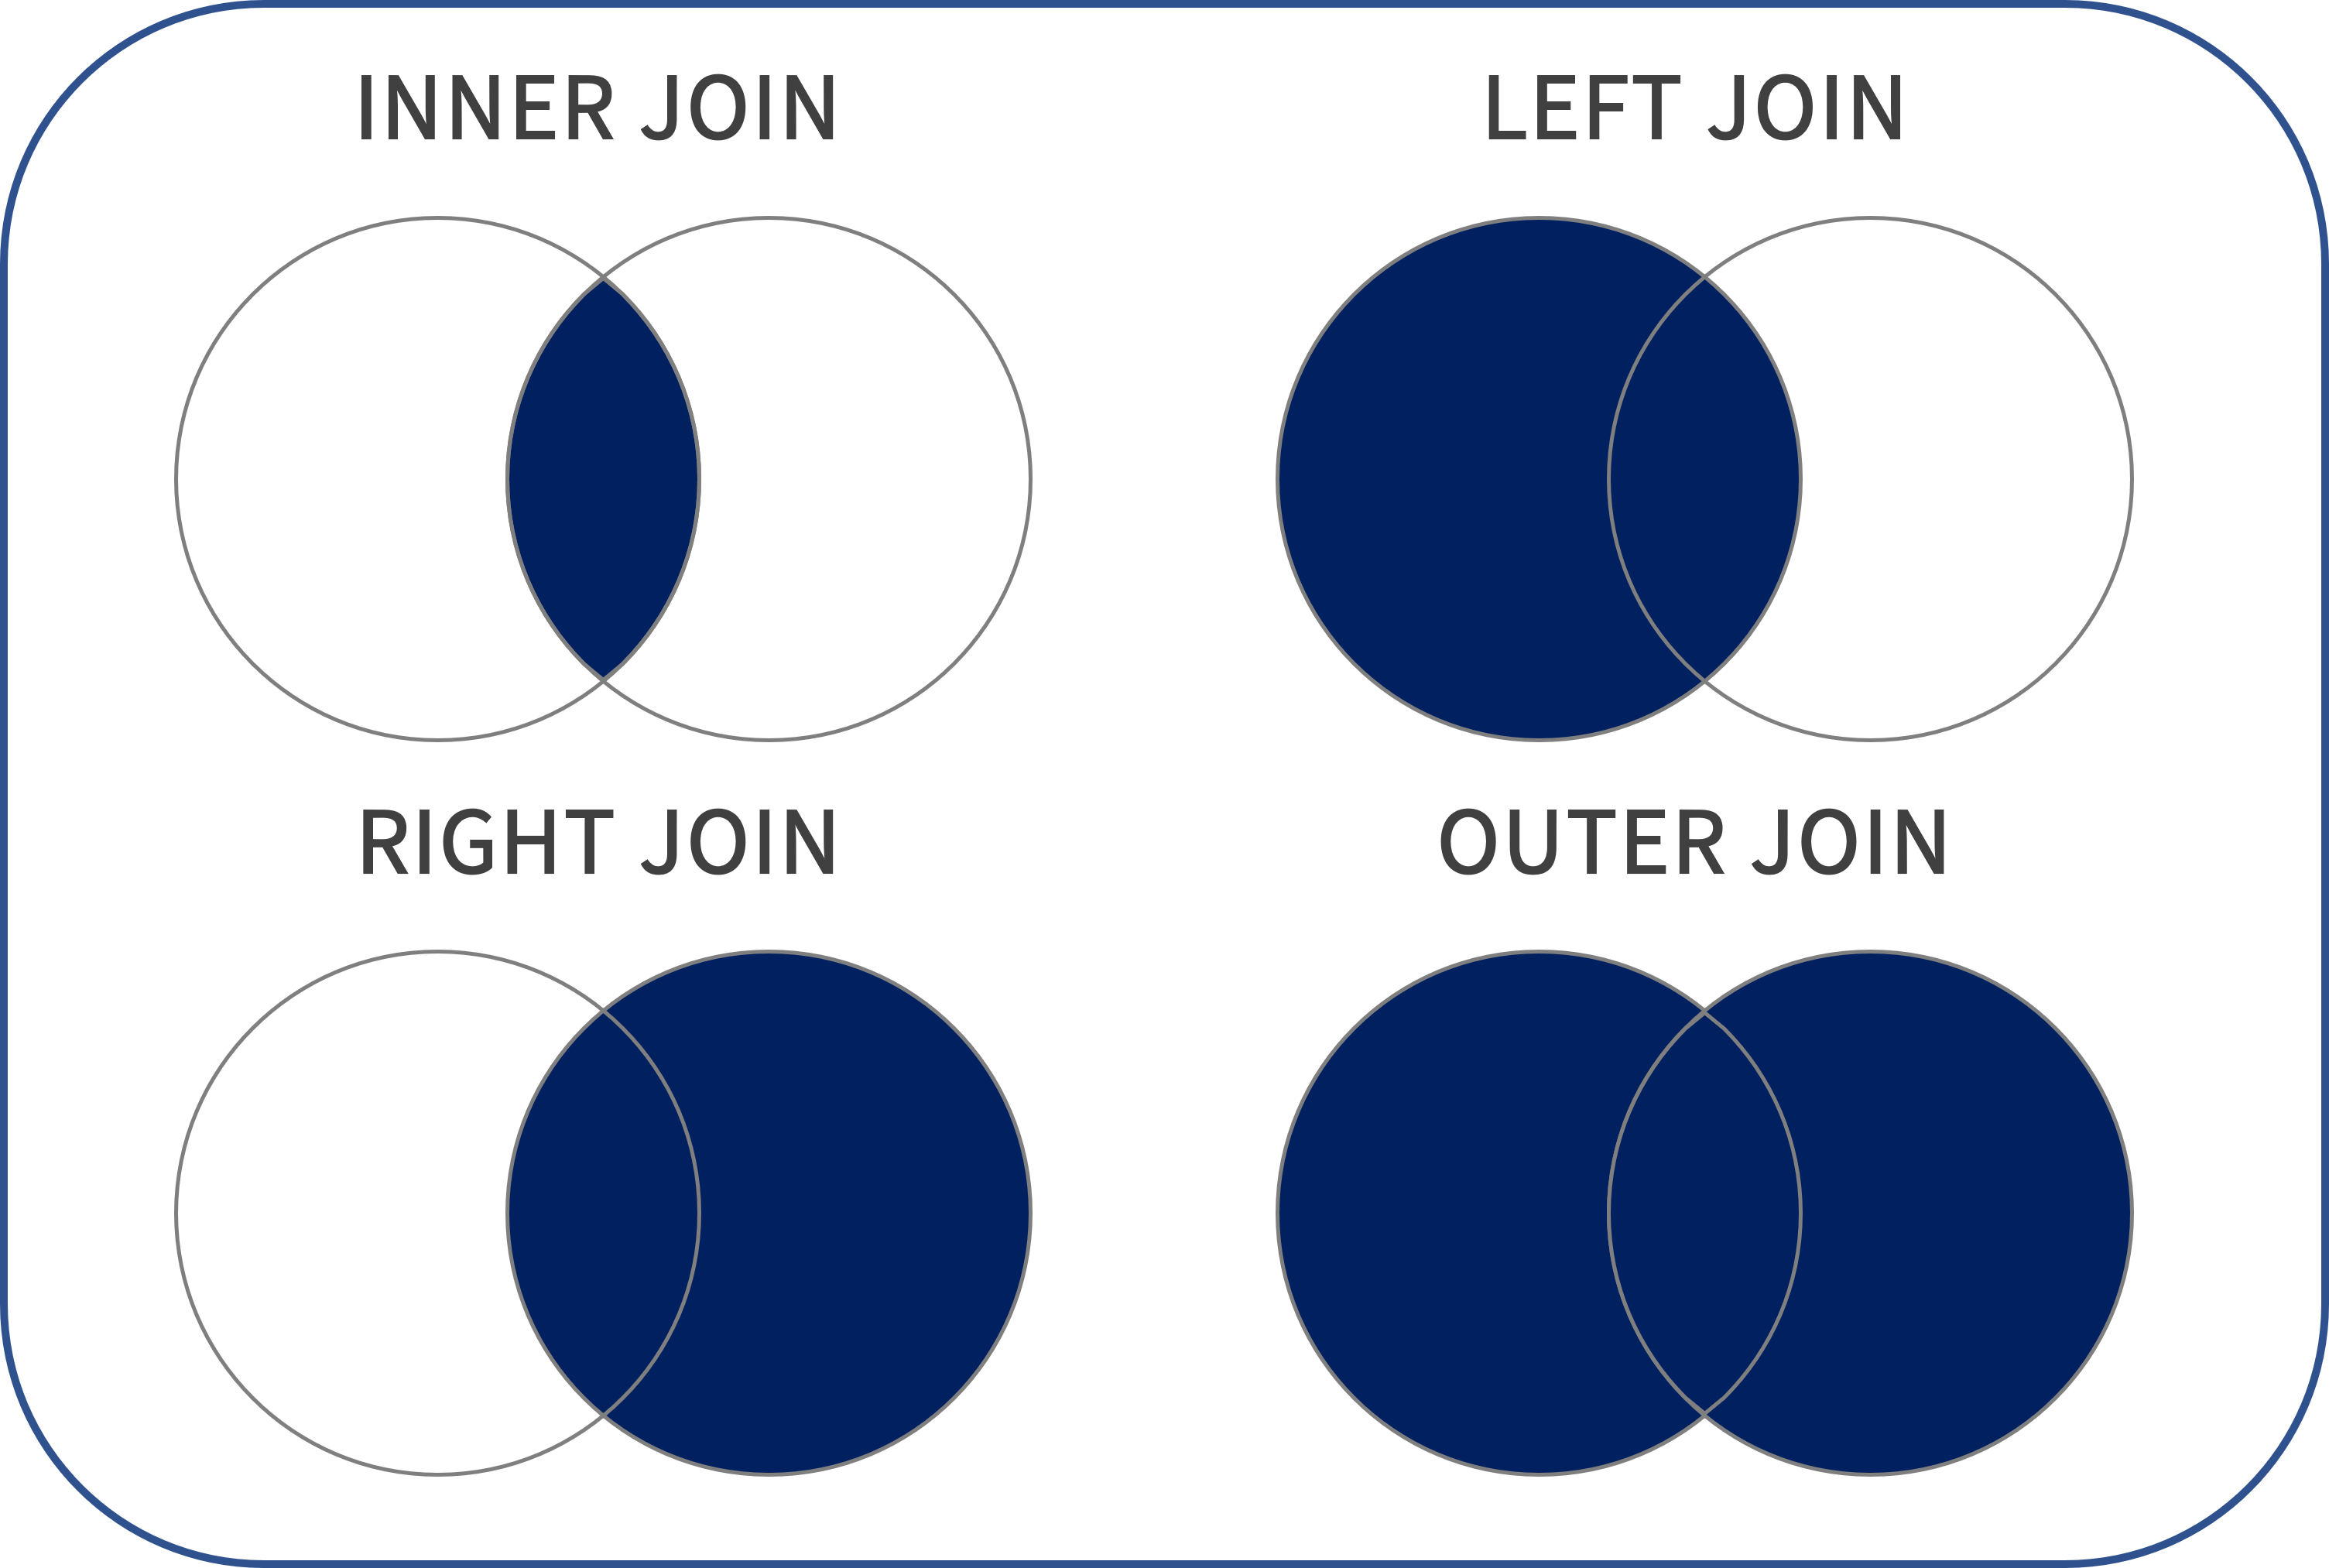

> 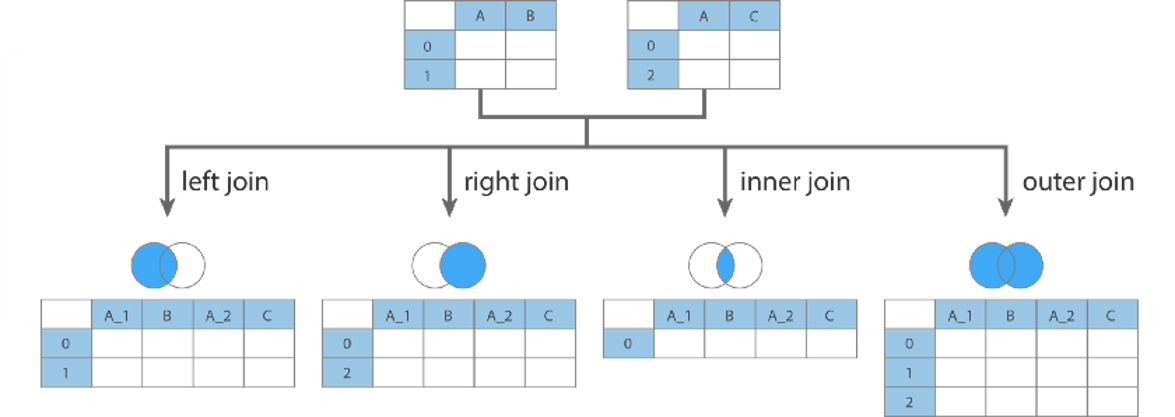

In [6]:
df1

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45

In [7]:
df2

Korean Name    Instagram
3          김효연  watasiwahyo
4          권유리      yulyulk
5          최수영   hotsootuff
6          임윤아   yoona__lim
7          서주현  seojuhyun_s
8        제시카 정  jessica.syj
9          이채린    chaelincl
10          박봄   haroobommi

> **`join` 을 사용하기 위해서는, 키로 지정할 열을 "인덱스화" 시켜주어야 합니다.**
> - `set_index('키로 지정할 열')` 사용법

> **1. [join] Left Join**

In [8]:
# left join
# df1.join(df2, on='키 인덱스', how='조인 방법', sort='정렬 여부')
# df1.join(df2, on='Korean Name', how='left') # 에러 발생!
df1.join(df2.set_index('Korean Name'), on='Korean Name', how='left')

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight    Instagram  
0  South Korea            NaN     160      44          NaN  
1  South Korea            NaN     158      43          NaN  
2  South Korea            USA     163      50          NaN  
3  South Korea            NaN     158      48  watasiwahyo  
4  South Korea            NaN     167      45      yulyulk

> **2. [join] Right Join**

In [9]:
df1.join(df2.set_index('Korean Name'), on='Korean Name', how='right')

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
3.0    Hyoyeon  Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4.0       Yuri    Kwon Yuri         권유리            유리    1989-12-05  SNSD   
NaN        NaN          NaN         최수영           NaN           NaN   NaN   
NaN        NaN          NaN         임윤아           NaN           NaN   NaN   
NaN        NaN          NaN         서주현           NaN           NaN   NaN   
NaN        NaN          NaN       제시카 정           NaN           NaN   NaN   
NaN        NaN          NaN         이채린           NaN           NaN   NaN   
NaN        NaN          NaN          박봄           NaN           NaN   NaN   

         Country Second Country  Height  Weight    Instagram  
3.0  South Korea            NaN   158.0    48.0  watasiwahyo  
4.0  South Korea            NaN   167.0    45.0      yulyulk  
NaN          NaN            NaN     NaN     NaN   hotsootuff  
NaN          NaN            NaN     NaN     NaN   yoona__lim  
NaN          NaN            NaN     NaN     NaN  seojuhyun_s  
NaN          NaN            NaN     NaN     NaN  jessica.syj  
NaN          NaN            NaN     NaN     NaN    chaelincl  
NaN          NaN            NaN     NaN     NaN   haroobommi

> **3. [join] Inner Join**

In [10]:
df1.join(df2.set_index('Korean Name'), on='Korean Name', how='inner')

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
3    Hyoyeon  Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri    Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight    Instagram  
3  South Korea            NaN     158      48  watasiwahyo  
4  South Korea            NaN     167      45      yulyulk

> **4. [join] Outer Join**

In [11]:
df1.join(df2.set_index('Korean Name'), on='Korean Name', how='outer')

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
4.0       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
0.0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
3.0    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
NaN        NaN            NaN          박봄           NaN           NaN   NaN   
NaN        NaN            NaN         서주현           NaN           NaN   NaN   
1.0      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
NaN        NaN            NaN         이채린           NaN           NaN   NaN   
NaN        NaN            NaN         임윤아           NaN           NaN   NaN   
NaN        NaN            NaN       제시카 정           NaN           NaN   NaN   
NaN        NaN            NaN         최수영           NaN           NaN   NaN   
2.0    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   

         Country Second Country  Height  Weight    Instagram  
4.0  South Korea            NaN   167.0    45.0      yulyulk  
0.0  South Korea            NaN   160.0    44.0          NaN  
3.0  South Korea            NaN   158.0    48.0  watasiwahyo  
NaN          NaN            NaN     NaN     NaN   haroobommi  
NaN          NaN            NaN     NaN     NaN  seojuhyun_s  
1.0  South Korea            NaN   158.0    43.0          NaN  
NaN          NaN            NaN     NaN     NaN    chaelincl  
NaN          NaN            NaN     NaN     NaN   yoona__lim  
NaN          NaN            NaN     NaN     NaN  jessica.syj  
NaN          NaN            NaN     NaN     NaN   hotsootuff  
2.0  South Korea            USA   163.0    50.0          NaN

> ###  **3-9-2. Merge(추천)**


> **두개의 데이터 프레임(DataFrame) 을 겹치는 "값(Value)" 기준으로 합치는 것**
> - Merge 를 사용하면, **Join 에서 겹치는 인덱스를 따로 지정해 주어야 하는 작업이 없어집니다!**
> - 단지 **두개 이상의 겹치는 컬럼만** 있으면 됩니다.
> - Join 과 똑같이 **'`Inner Merge`', '`Left Merge`', '`Right Merge`', '`Outer Merge`', 4가지 방식이 있습니다.**
> - 기본 사용법
    - **`pd.merge(df1, df2, on='키 컬럼', how='조인 방법', sort='정렬 여부')`**


> **1. [merge] Left Merge**

In [12]:
pd.merge(df1, df2, on='Korean Name', how='left')

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight    Instagram  
0  South Korea            NaN     160      44          NaN  
1  South Korea            NaN     158      43          NaN  
2  South Korea            USA     163      50          NaN  
3  South Korea            NaN     158      48  watasiwahyo  
4  South Korea            NaN     167      45      yulyulk

In [13]:
df1.merge(df2, on='Korean Name', how='left')

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight    Instagram  
0  South Korea            NaN     160      44          NaN  
1  South Korea            NaN     158      43          NaN  
2  South Korea            USA     163      50          NaN  
3  South Korea            NaN     158      48  watasiwahyo  
4  South Korea            NaN     167      45      yulyulk

> **2. [merge] Right Merge**

In [14]:
pd.merge(df1, df2, on='Korean Name', how='right')

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Hyoyeon  Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
1       Yuri    Kwon Yuri         권유리            유리    1989-12-05  SNSD   
2        NaN          NaN         최수영           NaN           NaN   NaN   
3        NaN          NaN         임윤아           NaN           NaN   NaN   
4        NaN          NaN         서주현           NaN           NaN   NaN   
5        NaN          NaN       제시카 정           NaN           NaN   NaN   
6        NaN          NaN         이채린           NaN           NaN   NaN   
7        NaN          NaN          박봄           NaN           NaN   NaN   

       Country Second Country  Height  Weight    Instagram  
0  South Korea            NaN   158.0    48.0  watasiwahyo  
1  South Korea            NaN   167.0    45.0      yulyulk  
2          NaN            NaN     NaN     NaN   hotsootuff  
3          NaN            NaN     NaN     NaN   yoona__lim  
4          NaN            NaN     NaN     NaN  seojuhyun_s  
5          NaN            NaN     NaN     NaN  jessica.syj  
6          NaN            NaN     NaN     NaN    chaelincl  
7          NaN            NaN     NaN     NaN   haroobommi

> **3. [merge] Inner Merge**

In [15]:
pd.merge(df1, df2, on='Korean Name', how='inner')

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Hyoyeon  Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
1       Yuri    Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight    Instagram  
0  South Korea            NaN     158      48  watasiwahyo  
1  South Korea            NaN     167      45      yulyulk

> **4. [merge] Outer Merge**

In [16]:
pd.merge(df1, df2, on='Korean Name', how='outer')

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0        Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
1     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
2     Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
3         NaN            NaN          박봄           NaN           NaN   NaN   
4         NaN            NaN         서주현           NaN           NaN   NaN   
5       Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
6         NaN            NaN         이채린           NaN           NaN   NaN   
7         NaN            NaN         임윤아           NaN           NaN   NaN   
8         NaN            NaN       제시카 정           NaN           NaN   NaN   
9         NaN            NaN         최수영           NaN           NaN   NaN   
10    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   

        Country Second Country  Height  Weight    Instagram  
0   South Korea            NaN   167.0    45.0      yulyulk  
1   South Korea            NaN   160.0    44.0          NaN  
2   South Korea            NaN   158.0    48.0  watasiwahyo  
3           NaN            NaN     NaN     NaN   haroobommi  
4           NaN            NaN     NaN     NaN  seojuhyun_s  
5   South Korea            NaN   158.0    43.0          NaN  
6           NaN            NaN     NaN     NaN    chaelincl  
7           NaN            NaN     NaN     NaN   yoona__lim  
8           NaN            NaN     NaN     NaN  jessica.syj  
9           NaN            NaN     NaN     NaN   hotsootuff  
10  South Korea            USA   163.0    50.0          NaN

> ###  **3-9-3. Concat**


> **두개의 데이터 프레임(DataFrame) 을 단순히 붙이는 방법**
> - 위의 Join, Merge 개념과 **다른** 개념!
> - `concat` 은 행이나 열 방향으로 **데이터 프레임을 붙일 수 있습니다.**
> - 행 방향 붙이기 (axis=0), 열 방향 붙이기 (aixs=1)
> - 기본 사용법
    - **`pd.concat([df1, df2], axis='붙이는 방향')`**

> **행(row) 방향 데이터 붙이기**

In [17]:
pd.concat([df1,df2], axis=0)

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1       Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2     Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3     Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4        Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
3         NaN            NaN         김효연           NaN           NaN   NaN   
4         NaN            NaN         권유리           NaN           NaN   NaN   
5         NaN            NaN         최수영           NaN           NaN   NaN   
6         NaN            NaN         임윤아           NaN           NaN   NaN   
7         NaN            NaN         서주현           NaN           NaN   NaN   
8         NaN            NaN       제시카 정           NaN           NaN   NaN   
9         NaN            NaN         이채린           NaN           NaN   NaN   
10        NaN            NaN          박봄           NaN           NaN   NaN   

        Country Second Country  Height  Weight    Instagram  
0   South Korea            NaN   160.0    44.0          NaN  
1   South Korea            NaN   158.0    43.0          NaN  
2   South Korea            USA   163.0    50.0          NaN  
3   South Korea            NaN   158.0    48.0          NaN  
4   South Korea            NaN   167.0    45.0          NaN  
3           NaN            NaN     NaN     NaN  watasiwahyo  
4           NaN            NaN     NaN     NaN      yulyulk  
5           NaN            NaN     NaN     NaN   hotsootuff  
6           NaN            NaN     NaN     NaN   yoona__lim  
7           NaN            NaN     NaN     NaN  seojuhyun_s  
8           NaN            NaN     NaN     NaN  jessica.syj  
9           NaN            NaN     NaN     NaN    chaelincl  
10          NaN            NaN     NaN     NaN   haroobommi

> **열(column) 방향 데이터 붙이기**

In [18]:
pd.concat([df1,df2], axis=1)

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1       Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2     Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3     Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4        Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5         NaN            NaN         NaN           NaN           NaN   NaN   
6         NaN            NaN         NaN           NaN           NaN   NaN   
7         NaN            NaN         NaN           NaN           NaN   NaN   
8         NaN            NaN         NaN           NaN           NaN   NaN   
9         NaN            NaN         NaN           NaN           NaN   NaN   
10        NaN            NaN         NaN           NaN           NaN   NaN   

        Country Second Country  Height  Weight Korean Name    Instagram  
0   South Korea            NaN   160.0    44.0         NaN          NaN  
1   South Korea            NaN   158.0    43.0         NaN          NaN  
2   South Korea            USA   163.0    50.0         NaN          NaN  
3   South Korea            NaN   158.0    48.0         김효연  watasiwahyo  
4   South Korea            NaN   167.0    45.0         권유리      yulyulk  
5           NaN            NaN     NaN     NaN         최수영   hotsootuff  
6           NaN            NaN     NaN     NaN         임윤아   yoona__lim  
7           NaN            NaN     NaN     NaN         서주현  seojuhyun_s  
8           NaN            NaN     NaN     NaN       제시카 정  jessica.syj  
9           NaN            NaN     NaN     NaN         이채린    chaelincl  
10          NaN            NaN     NaN     NaN          박봄   haroobommi

> **겹치는 값만 붙이기 (join 활용)**

In [19]:
pd.concat([df1,df2], axis=1, join='inner')

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
3    Hyoyeon  Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri    Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight Korean Name    Instagram  
3  South Korea            NaN     158      48         김효연  watasiwahyo  
4  South Korea            NaN     167      45         권유리      yulyulk